<center>
<font size=6px><b>
Challenge Set 3<br>
<font size=4px>
Linear Splitting
</font>
</center>

## CHALLENGE 1
Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome

In [2]:
import numpy as np
import pandas as pd
import csv

Step 1: Load data from CSV file and replace missing values with means

In [3]:
df = pd.read_csv("../../../challenges_data/2013_movies.csv")
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


Use linear regression to replace missing values

In [4]:
import statsmodels.api as sm

In [11]:
df['Ones']=1.0
yTrain = df.Budget[df.Budget.isnull() == False]
yTest = df.Budget[df.Budget.isnull() == True]
xTrain = df[['Ones','DomesticTotalGross','Runtime']] [df.Budget.isnull() == False]
xTest = df[['Ones','DomesticTotalGross','Runtime']] [df.Budget.isnull() == True]
model = sm.OLS(yTrain, xTrain)
results = model.fit()
for i in yTest.index:
    df.Budget.loc[i] = results.predict(xTest.loc[i])

In [12]:
df.describe()

,Budget,DomesticTotalGross,Runtime,Ones
count,1.000000e+02,1.000000e+02,100.000000,100.0
mean,7.375556e+07,1.005969e+08,112.260000,1.0
std,5.758788e+07,8.739641e+07,18.190696,0.0
min,2.500000e+06,2.556825e+07,75.000000,1.0
25%,3.000000e+07,4.270413e+07,98.000000,1.0
50%,5.492838e+07,6.954237e+07,112.000000,1.0
75%,1.062500e+08,1.204759e+08,123.000000,1.0
max,2.250000e+08,4.246680e+08,180.000000,1.0


In [13]:
model = sm.OLS(df.DomesticTotalGross, sm.add_constant(df.Ones))
results = model.fit()

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 28 Jul 2016   Prob (F-statistic):                nan
Time:                        08:47:22   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Ones        1.006e+08   8.74e+06     11.510      0.000      8.33e+07  1.18e+08
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
print results.predict()[:10]
print df.DomesticTotalGross.mean()

[  1.00596875e+08   1.00596875e+08   1.00596875e+08   1.00596875e+08
   1.00596875e+08   1.00596875e+08   1.00596875e+08   1.00596875e+08
   1.00596875e+08   1.00596875e+08]
100596875.22


__QUESTION:__

How can you interpret the results of this model? What does it predict? 

__ANSWER:__

When using a constant to build a linear model, the fitted model produces an array of identical values, which is the mean of all the independent variable values.

Make a plot of predictions against actual outcome and a histogram of residuals

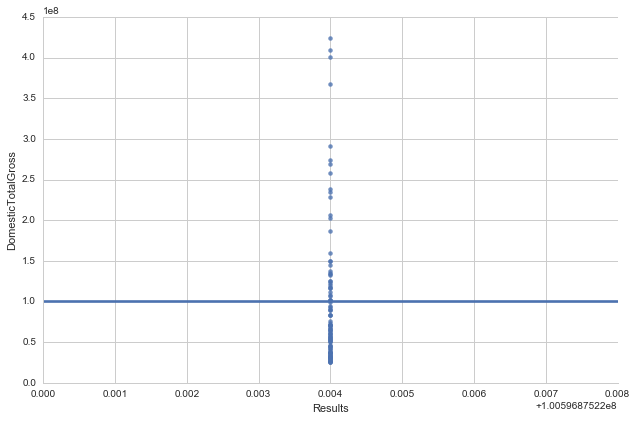

In [18]:
%matplotlib inline
import matplotlib as plt
import seaborn as sns
df["Results"] = results.predict()
sns.set_style("whitegrid")
plot1 = sns.lmplot("Results", "DomesticTotalGross", fit_reg=True, ci=0, size=6, aspect=1.5, data=df)
print ""

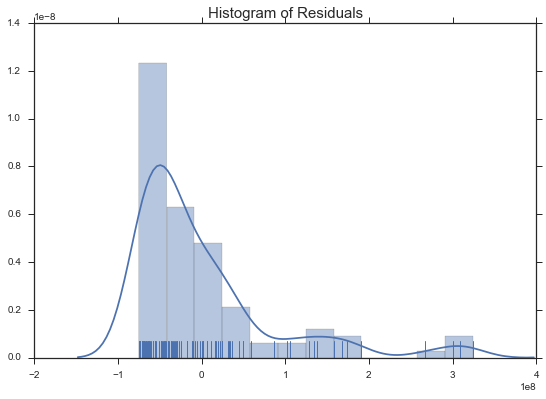

In [19]:
fitModel = model.fit()
sns.set_style("ticks", {})
plot2 = sns.distplot(fitModel.resid, rug=True)
plot2.figure.set_size_inches(9, 6)
plot2.set_title("Histogram of Residuals", fontsize="15")
print ""

__QUESTION:__

How are the residuals distributed?

__ANSWER:__

A plot of the A histogram of the residuals is skewed to the right

## CHALLENGE 2
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable (Budget)

In [20]:
model2 = sm.OLS(df.DomesticTotalGross, df.Budget)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     208.5
Date:                Thu, 28 Jul 2016   Prob (F-statistic):           4.20e-26
Time:                        08:51:41   Log-Likelihood:                -1955.8
No. Observations:                 100   AIC:                             3914.
Df Residuals:                      99   BIC:                             3916.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Budget         1.1723      0.081     14.439      0.000         1.011     1.333
==============================================================================
Omnibus:                       19.929   Durbin-Watson:                   1.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.465
Skew:                           0.752   Prob(JB):                     1.63e-09
Kurtosis:                       5.729   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

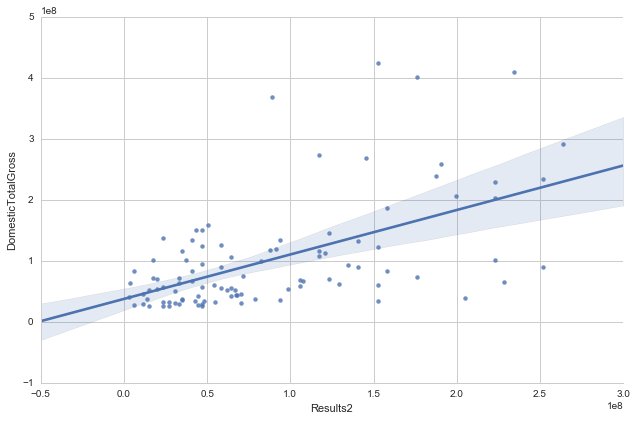

In [21]:
df["Results2"] = results2.predict()
sns.set_style("whitegrid")
plot3 = sns.lmplot("Results2", "DomesticTotalGross", fit_reg=True, size=6, aspect=1.5, data=df)

Also add plots of model prediction against your feature variable and residuals against feature variable

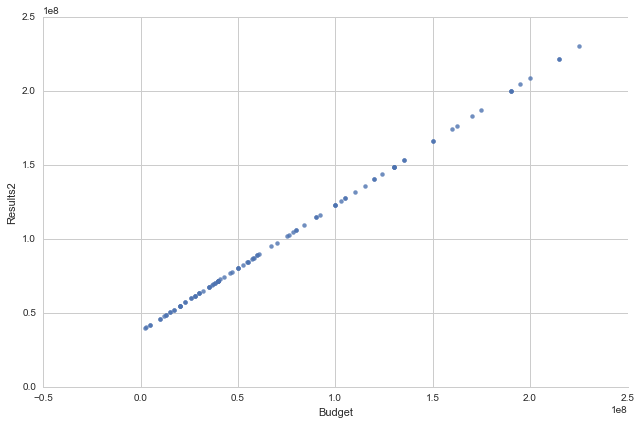

In [165]:
plot4 = sns.lmplot("Budget", "Results2", fit_reg=False, size=6, aspect=1.5, data=df)

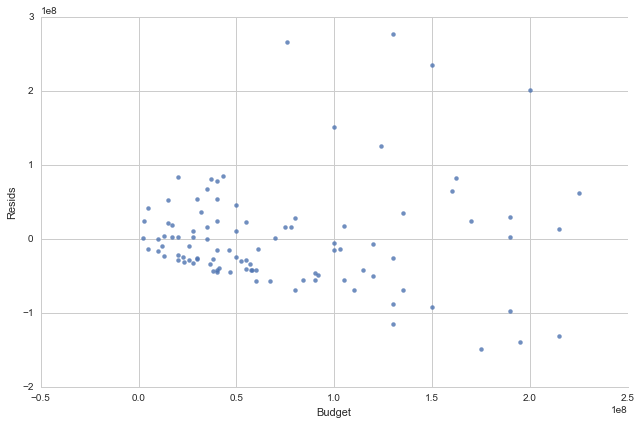

In [166]:
df["Resids"] = model2.fit().resid
plot4 = sns.lmplot("Budget", "Resids", fit_reg=False, size=6, aspect=1.5, data=df)

How can you interpret what's happening in the model?

## CHALLENGE 3
Repeat the process of challenge 1, but add a categorical feature (like genre). Convert a column of text into a number of numerical columns.

In [23]:
from patsy import dmatrices

In [24]:
dfDummies = pd.get_dummies(df, columns=["Rating"])
dfDummies.head()

,Title,Budget,DomesticTotalGross,Director,Runtime,ReleaseDate,Ones,Results2,Results,Rating_G,Rating_PG,Rating_PG-13,Rating_R
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,146,2013-11-22 00:00:00,1.0,1.524012e+08,1.005969e+08,0.0,0.0,1.0,0.0
1,Iron Man 3,200000000.0,409013994,Shane Black,129,2013-05-03 00:00:00,1.0,2.344634e+08,1.005969e+08,0.0,0.0,1.0,0.0
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,108,2013-11-22 00:00:00,1.0,1.758476e+08,1.005969e+08,0.0,1.0,0.0,0.0
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,98,2013-07-03 00:00:00,1.0,8.909611e+07,1.005969e+08,0.0,1.0,0.0,0.0
4,Man of Steel,225000000.0,291045518,Zack Snyder,143,2013-06-14 00:00:00,1.0,2.637714e+08,1.005969e+08,0.0,0.0,1.0,0.0


In [27]:
y, x = dmatrices("DomesticTotalGross ~ Budget + Rating_R", data = dfDummies)
model3 = sm.OLS(y, x)
results3 = model3.fit()

In [28]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     22.56
Date:                Thu, 28 Jul 2016   Prob (F-statistic):           9.02e-09
Time:                        08:53:00   Log-Likelihood:                -1950.9
No. Observations:                 100   AIC:                             3908.
Df Residuals:                      97   BIC:                             3916.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   3.925e+07   1.63e+07      2.407      0.018      6.88e+06  7.16e+07
Budget         0.8448      0.143      5.891      0.000         0.560     1.129
Rating_R   -2.599e+06    1.7e+07     -0.153      0.879     -3.64e+07  3.12e+07
==============================================================================
Omnibus:                       39.762   Durbin-Watson:                   0.699
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.923
Skew:                           1.472   Prob(JB):                     8.98e-22
Kurtosis:                       6.820   Cond. No.                     2.77e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
dfDummies["Results3"] = results3.predict()
dfDummies["Results3"]

0     1.490722e+08
1     2.082062e+08
2     1.659676e+08
3     1.034545e+08
4     2.293255e+08
5     1.237290e+08
6     1.441268e+08
7     1.764828e+08
8     1.744153e+08
9     2.208778e+08
10    1.997585e+08
11    1.828631e+08
12    1.997585e+08
13    1.532961e+08
14    7.297810e+07
15    6.790947e+07
16    7.044378e+07
17    1.279529e+08
18    5.354835e+07
19    6.621992e+07
20    1.068336e+08
21    1.406245e+08
22    8.149047e+07
23    7.044378e+07
24    1.490722e+08
25    1.051441e+08
26    1.026098e+08
27    1.211301e+08
28    6.459504e+07
29    1.236644e+08
          ...     
70    8.733921e+07
71    4.769961e+07
72    8.824864e+07
73    8.796593e+07
74    8.559333e+07
75    6.875424e+07
76    3.876485e+07
77    1.870869e+08
78    9.328216e+07
79    4.938915e+07
80    6.199607e+07
81    1.068336e+08
82    6.199607e+07
83    6.763078e+07
84    1.490722e+08
85    7.387654e+07
86    5.599677e+07
87    7.614430e+07
88    5.614732e+07
89    8.993819e+07
90    6.121595e+07
91    7.3042

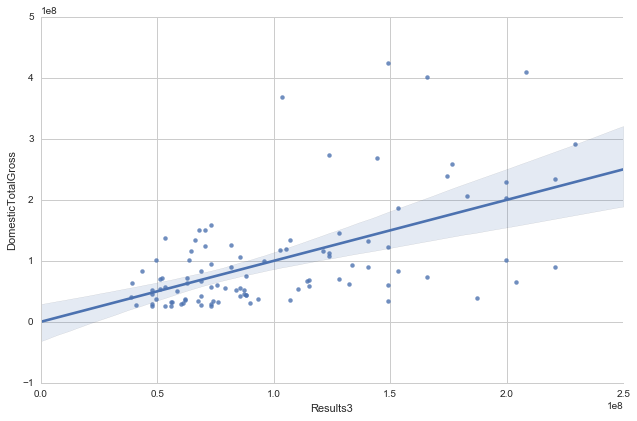

In [29]:

sns.set_style("whitegrid")
plot5 = sns.lmplot("Results3", "DomesticTotalGross", fit_reg=True, size=6, aspect=1.5, data=dfDummies)

In [30]:
plot4 = sns.lmplot("Budget", "Results2", fit_reg=False, size=6, aspect=1.5, data=df)

AttributeError: 'OLS' object has no attribute 'resid'

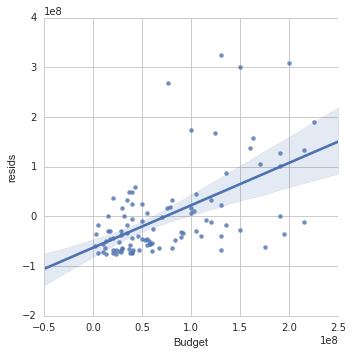

In [282]:
sns.lmplot(data=df, x="Budget", y="resids")

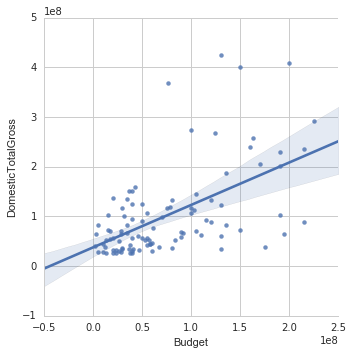

In [295]:
sns.lmplot(data=df, x="Budget", y="DomesticTotalGross")

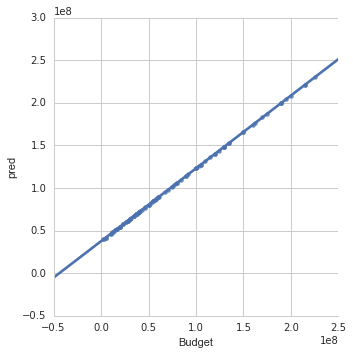

In [296]:
sns.lmplot(data=df, x="Budget", y="pred")